In [96]:
import numpy as np
def MapHierach( a, b):
    I = np.count_nonzero(np.logical_and(a, b))
    A=np.count_nonzero(a)
    B=np.count_nonzero(b)
    return I/A



In [97]:
# from scipy.stats import entropy
# def MI(a,b):
#     return metrics.mutual_info_score(a,b)/(entropy(a,b)+entropy(b,a))/2

In [98]:
from sklearn import metrics
def LayerHierach(A,B):
    D=[]
    for i,a in enumerate(A):
        D.append([])
        print(i)
        for j,b in enumerate(B):
            score=MapHierach(a,b)
            D[i].append(score)
    return D


In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
def plot(D,file):
    mask = np.zeros_like(D, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(15,15))
    sns_plot=sns.clustermap(D,cmap="Reds",vmin=0, vmax=1)
    plt.savefig(file)
    





In [161]:
import numpy as np
def run(task):
    map1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map1.npy')
    map2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map2.npy')
    map3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map3.npy')
    D12=LayerHierach(map1,map2)
    D23=LayerHierach(map2,map3)
    plot(D12,'/storage/dbn/Hierarchy/'+task+'_D12.png')
    plot(D23,'/storage/dbn/Hierarchy/'+task+'_D23.png')
from joblib import Parallel, delayed    
tasks=['EMOTION','GAMBLING']
Parallel(n_jobs=7)(delayed(run)(task) for task in tasks)


#run('GAMBLING')

    




[None, None]

In [57]:
task='GAMBLING'
map1=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map1.npy')
map2=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map2.npy')
map3=np.load('/home/share/TmpData/Qinglin/HCP_Group_DBN/'+task+'_map3.npy')
D12=LayerHierach(map1,map2)
D23=LayerHierach(map2,map3)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [28]:

import operator
def find_max(h,Low):
    D=[]

    for i,l in enumerate(Low):
        score=MapHierach(h,l)
        D.append(score)
    index, value = max(enumerate(D), key=operator.itemgetter(1))
    return index



80


[[0.0,
  0.004739336492890996,
  0.0,
  0.43033175355450237,
  0.9819905213270143,
  0.0018957345971563982,
  0.0009478672985781991,
  0.06540284360189573,
  0.0009478672985781991,
  0.012322274881516588,
  0.24644549763033174,
  0.0,
  0.5393364928909953,
  0.015165876777251185,
  0.2995260663507109,
  0.005687203791469194,
  0.0,
  0.05402843601895735,
  0.8502369668246446,
  0.6218009478672986,
  0.21421800947867298,
  0.7146919431279621,
  0.9355450236966825,
  0.762085308056872,
  0.36018957345971564,
  0.8635071090047394,
  0.0,
  0.0,
  0.5895734597156398,
  0.014218009478672985,
  0.0,
  0.0,
  0.11374407582938388,
  0.3232227488151659,
  0.9535545023696682,
  0.23886255924170616,
  0.11563981042654028,
  0.0018957345971563982,
  0.0009478672985781991,
  0.64739336492891,
  0.7165876777251184,
  0.7725118483412322,
  0.0,
  0.25876777251184835,
  0.0,
  0.6009478672985782,
  0.009478672985781991,
  0.0,
  0.22938388625592418,
  0.46350710900473935,
  0.4947867298578199,
  0.010

In [79]:
from nilearn.datasets import load_mni152_brain_mask
mask_img = load_mni152_brain_mask()

from nilearn.input_data import NiftiMasker
masker = NiftiMasker(mask_img=mask_img, standardize=True)
masker.fit()

def plot_surf(components_img,idx):
    
    components_img[components_img<4.2]=0
    components_img = masker.inverse_transform(components_img[idx])

    from nilearn import plotting
    view = plotting.view_img_on_surf(components_img, threshold=0.1)
    view.open_in_browser()
    
# view.save_as_html("/storage/dbn/surface_plot.html")     

/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


In [61]:
def find_max_plot_surf(idx_3):
    idx_2=find_max(map3[idx_3],map2)
    idx_1=find_max(map2[idx_2],map1) 
    print(idx_3,idx_2,idx_1)
    plot_surf(map3,idx_3)
    plot_surf(map2,idx_2)
    plot_surf(map1,idx_1)
    

In [95]:
find_max_plot_surf(47)

47 97 92


/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/uga_qinglin/.local/lib/python3.5/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/uga_qinglin/.local/lib/python3.5/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/uga_qinglin/.local/lib/python3.5/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated

In [56]:
plot_surf(map1,55)

/usr/local/lib/python3.5/dist-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None
/home/uga_qinglin/.local/lib/python3.5/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/uga_qinglin/.local/lib/python3.5/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  newarr = np.fromstring(zdec, dtype=dt)
/home/uga_qinglin/.local/lib/python3.5/site-packages/nibabel/gifti/parse_gifti_fast.py:62: DeprecationWarning: The binary mode of fromstring is deprecated

In [107]:
np.count_nonzero(D12)

7736

In [155]:
d12 = np.array(D12)
d23 = np.array(D23)

In [115]:
sum(i > 0.8 for i in d12)

array([ 3,  3,  5,  3,  2,  5,  2,  5,  5,  4,  5,  6,  4,  1,  0,  2,  2,
        0,  9,  1,  1,  2,  4,  3,  2,  4,  3,  1,  4,  2,  2,  6,  3,  5,
        2,  8,  4,  0,  4,  6,  6,  4,  3,  2,  2,  4,  2,  4,  3,  3,  4,
        1,  6,  6,  6,  4,  1,  3,  5,  3,  8,  3,  1,  6,  3,  4,  6,  4,
        1,  8,  0,  2,  3,  2,  4,  2,  3,  4,  2,  1,  3,  1,  0,  1,  4,
        4,  2,  3,  3,  1, 13,  6,  3,  4,  2,  4,  7,  6,  4,  2])

In [152]:
d12[np.where(d12<0.50)]=0
d23[np.where(d23<0.30)]=0

In [156]:
d23

array([[0.26412805, 0.10551254, 0.1297238 , ..., 0.17115451, 0.05489426,
        0.17912863],
       [0.07292273, 0.17020601, 0.14674575, ..., 0.04797966, 0.12508606,
        0.2714611 ],
       [0.05746297, 0.2671137 , 0.12256504, ..., 0.05500149, 0.0567415 ,
        0.19416034],
       ...,
       [0.24165391, 0.18153577, 0.12592431, ..., 0.19251805, 0.12119886,
        0.12133012],
       [0.15105798, 0.24541328, 0.20942274, ..., 0.20040913, 0.07172537,
        0.20258262],
       [0.05821687, 0.18107765, 0.21963979, ..., 0.0400568 , 0.08930573,
        0.15238024]])

In [135]:
(d12>0.5).sum()

1567

In [136]:
(d23>0.5).sum()

3

In [137]:
d23

array([[0.26412805, 0.10551254, 0.1297238 , ..., 0.17115451, 0.05489426,
        0.17912863],
       [0.07292273, 0.17020601, 0.14674575, ..., 0.04797966, 0.12508606,
        0.2714611 ],
       [0.05746297, 0.2671137 , 0.12256504, ..., 0.05500149, 0.0567415 ,
        0.19416034],
       ...,
       [0.24165391, 0.18153577, 0.12592431, ..., 0.19251805, 0.12119886,
        0.12133012],
       [0.15105798, 0.24541328, 0.20942274, ..., 0.20040913, 0.07172537,
        0.20258262],
       [0.05821687, 0.18107765, 0.21963979, ..., 0.0400568 , 0.08930573,
        0.15238024]])

In [151]:
d23

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<Figure size 1080x1080 with 0 Axes>

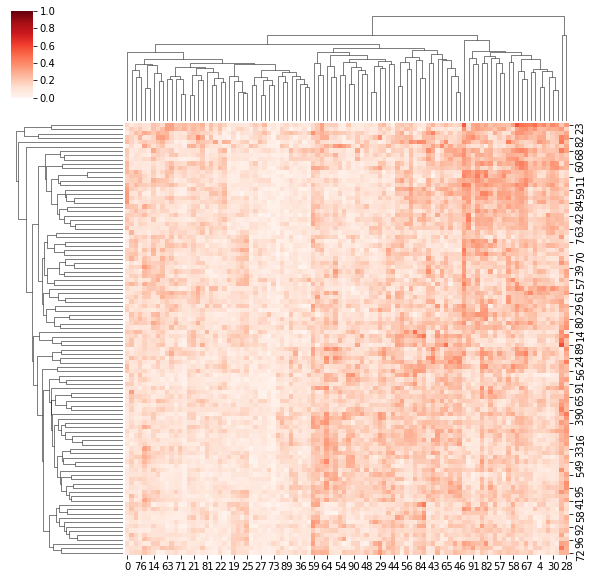

In [160]:

plot(D23,'/storage/dbn/Hierarchy/'+'GAMBLING'+'_D12_.png')